In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
!pip install openpyxl

In [ ]:
df = pd.read_excel('P556.xlsx')

In [ ]:
df.head()

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."


In [ ]:
df.tail()

,title,rating,body
1435,Excellent mobile,5,Excellent mobile
1436,Never expected from samsung,1,"All over mobile performance is very poor, neve..."
1437,Good value for money,5,Battery life is good but camera clarity could ...
1438,Unreal and whitish display,1,"It's a very bad product, highly dissatisfied....."
1439,Beast of the best.,5,The phone is a real beast the battery lasts ea...


In [ ]:
print(df.shape)

(1440, 3)


In [ ]:
print(df.dtypes)

title     object
rating     int64
body      object
dtype: object


In [ ]:
print(df.isnull().sum())

title     0
rating    0
body      0
dtype: int64


In [ ]:
df.describe()

,rating
count,1440.000000
mean,3.173611
std,1.584453
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
print(df['rating'].value_counts().sort_index())

rating
1    386
2    126
3    199
4    310
5    419
Name: count, dtype: int64


In [ ]:
df['text'] = df['title'].fillna('') + ' ' + df['body'].fillna('')
df['text_length'] = df['text'].apply(len)

In [ ]:
print(df.describe(include = 'all'))

                  title       rating  \
count              1440  1440.000000   
unique             1351          NaN   
top     Value for money          NaN   
freq                 16          NaN   
mean                NaN     3.173611   
std                 NaN     1.584453   
min                 NaN     1.000000   
25%                 NaN     1.000000   
50%                 NaN     4.000000   
75%                 NaN     5.000000   
max                 NaN     5.000000   

                                                     body  \
count                                                1440   
unique                                               1440   
top     Good phone for budget buyers. Sound quality is...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                            

In [ ]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['text_length'] = df['text'].apply(len)

In [ ]:
text_length_correlation = df[['text_length', 'word_count', 'rating']].corr()

In [ ]:
duplicate_reviews = df.duplicated(subset='text').sum()

In [ ]:
rating_distribution = df['rating'].value_counts().sort_index()

In [ ]:
word_count_stats = df['word_count'].describe()

{
    "Word Count Statistics": word_count_stats,
    "Rating Distribution": rating_distribution,
    "Correlation Between Features": text_length_correlation,
    "Number of Duplicate Reviews": duplicate_reviews
}

{'Word Count Statistics': count    1440.000000
 mean       58.257639
 std        39.896874
 min         2.000000
 25%        34.000000
 50%        49.000000
 75%        70.000000
 max       391.000000
 Name: word_count, dtype: float64,
 'Rating Distribution': rating
 1    386
 2    126
 3    199
 4    310
 5    419
 Name: count, dtype: int64,
 'Correlation Between Features':              text_length  word_count    rating
 text_length     1.000000    0.978927 -0.017907
 word_count      0.978927    1.000000 -0.022540
 rating         -0.017907   -0.022540  1.000000,
 'Number of Duplicate Reviews': np.int64(0)}

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

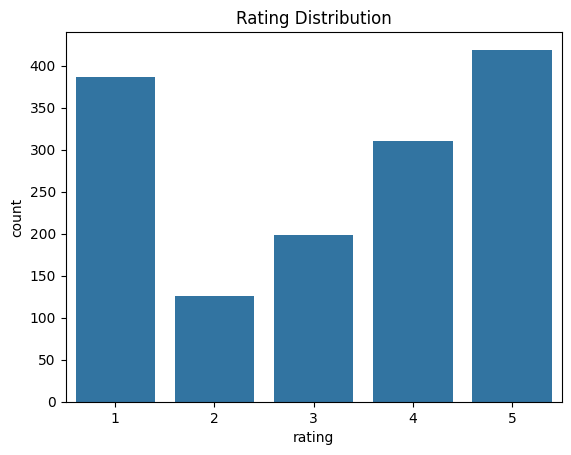

In [ ]:
sns.countplot(x='rating', data=df) # Rating distribution
plt.title("Rating Distribution")
plt.show()

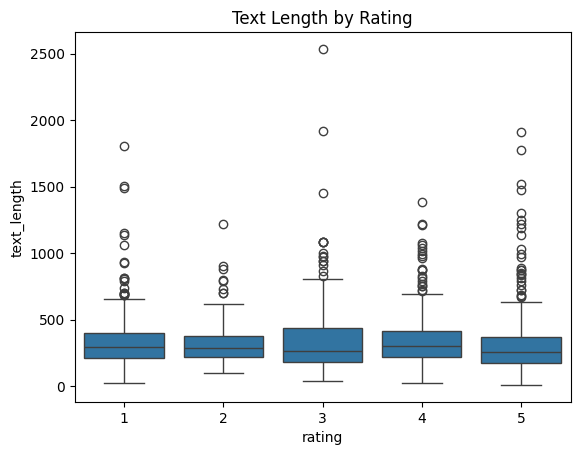

In [ ]:
sns.boxplot(x='rating', y='text_length', data=df)
plt.title("Text Length by Rating")
plt.show()

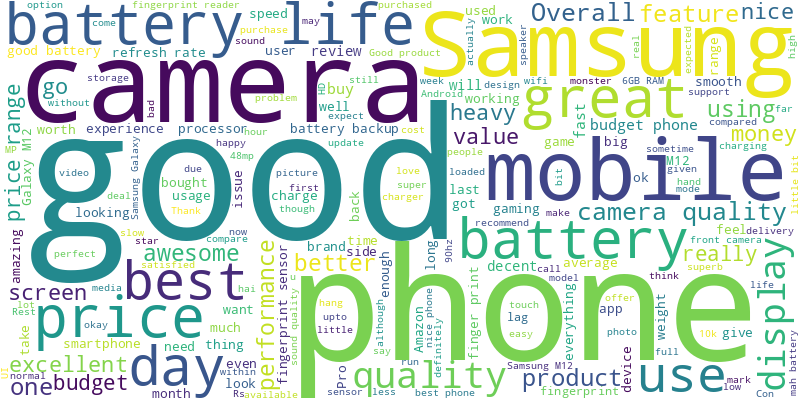

In [ ]:
pos_text = " ".join(df[df['rating'] >= 4]['text'])
WordCloud(width=800, height=400, background_color='white').generate(pos_text).to_image()

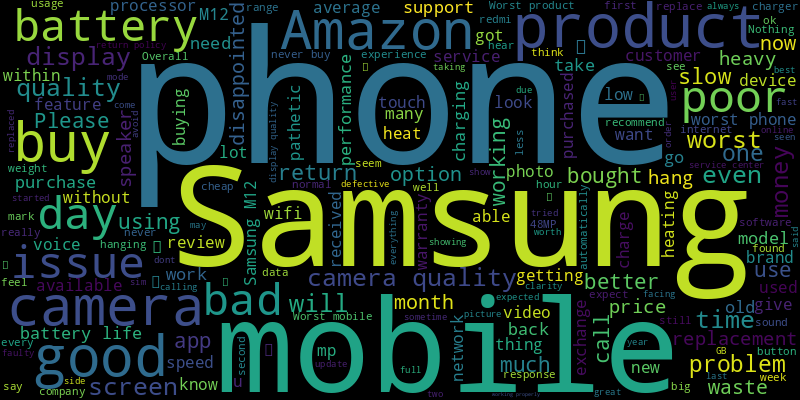

In [ ]:
neg_text = " ".join(df[df['rating'] <= 2]['text'])
WordCloud(width=800, height=400, background_color='black').generate(neg_text).to_image()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

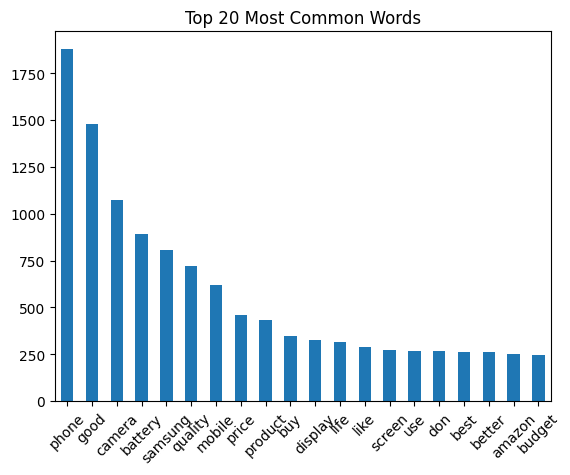

In [ ]:
cv = CountVectorizer(stop_words='english', max_features=20)
word_counts = cv.fit_transform(df['text'])
word_freq = pd.DataFrame(word_counts.toarray(), columns=cv.get_feature_names_out()).sum().sort_values(ascending=False)
word_freq.plot(kind='bar', title='Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.set(style="whitegrid")

/tmp/ipython-input-26-637136908.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette="Set2")


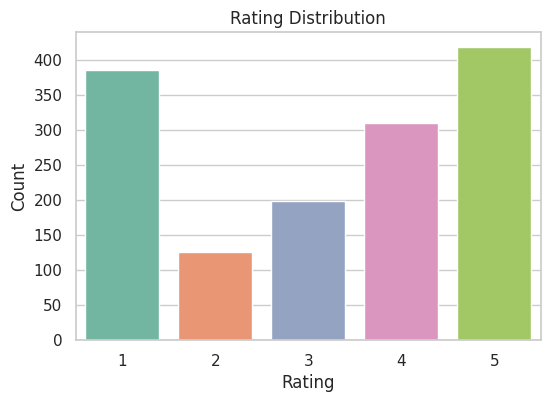

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='rating', data=df, palette="Set2")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-27-3531818789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='text_length', data=df, palette="Set3")


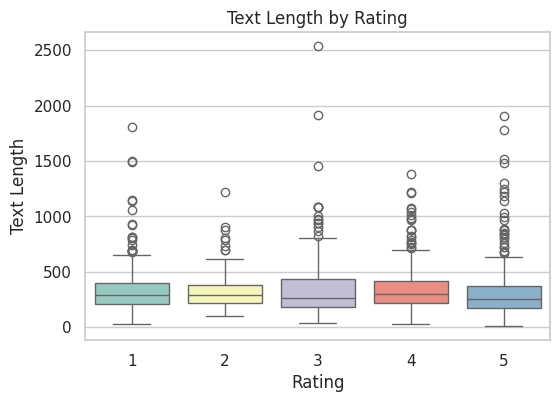

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='rating', y='text_length', data=df, palette="Set3")
plt.title("Text Length by Rating")
plt.xlabel("Rating")
plt.ylabel("Text Length")
plt.show()

/tmp/ipython-input-28-793824233.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='word_count', data=df, palette="Set1")


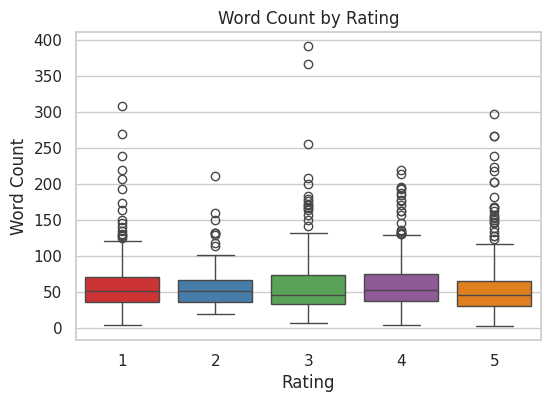

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='rating', y='word_count', data=df, palette="Set1")
plt.title("Word Count by Rating")
plt.xlabel("Rating")
plt.ylabel("Word Count")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else (0 if x <= 2 else None))
df = df.dropna(subset=['sentiment'])

In [ ]:
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X = tfidf.fit_transform(df['text'])
y = df['sentiment']

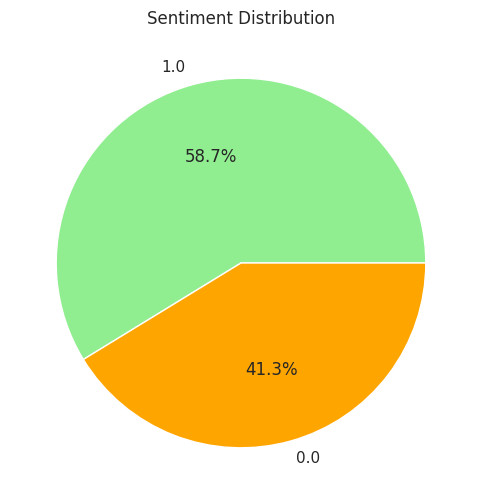

In [ ]:
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'orange', 'tomato'], figsize=(6, 6))
plt.title("Sentiment Distribution")
plt.ylabel('')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9236947791164659
              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90       103
         1.0       0.88      1.00      0.94       146

    accuracy                           0.92       249
   macro avg       0.94      0.91      0.92       249
weighted avg       0.93      0.92      0.92       249



In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8674698795180723
              precision    recall  f1-score   support

         0.0       0.99      0.69      0.81       103
         1.0       0.82      0.99      0.90       146

    accuracy                           0.87       249
   macro avg       0.90      0.84      0.85       249
weighted avg       0.89      0.87      0.86       249



In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9196787148594378
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.90       103
         1.0       0.89      0.98      0.93       146

    accuracy                           0.92       249
   macro avg       0.93      0.91      0.92       249
weighted avg       0.92      0.92      0.92       249



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9156626506024096
              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89       103
         1.0       0.87      1.00      0.93       146

    accuracy                           0.92       249
   macro avg       0.94      0.90      0.91       249
weighted avg       0.93      0.92      0.91       249



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:16:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9196787148594378
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.90       103
         1.0       0.89      0.98      0.93       146

    accuracy                           0.92       249
   macro avg       0.93      0.91      0.92       249
weighted avg       0.92      0.92      0.92       249



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8634538152610441
              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82       103
         1.0       0.84      0.95      0.89       146

    accuracy                           0.86       249
   macro avg       0.87      0.85      0.85       249
weighted avg       0.87      0.86      0.86       249



In [ ]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('lr', lr),
    ('nb', nb),
    ('svm', svm)
], voting='hard')

voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.9156626506024096
              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89       103
         1.0       0.88      0.99      0.93       146

    accuracy                           0.92       249
   macro avg       0.93      0.90      0.91       249
weighted avg       0.92      0.92      0.91       249



In [ ]:
model_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Voting Classifier": accuracy_score(y_test, y_pred_voting)
}

for name, score in model_scores.items():
    print(f"{name}: {score:.4f}")

Logistic Regression: 0.9237
Naive Bayes: 0.8675
SVM: 0.9197
Random Forest: 0.9157
XGBoost: 0.9197
KNN: 0.8635
Voting Classifier: 0.9157


In [ ]:
import joblib

# Save trained model (e.g., Logistic Regression)
joblib.dump(lr, "best_model.pkl")

# Save TF-IDF vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import joblib

# Load model and vectorizer
model = joblib.load("best_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

st.title("Customer Review Sentiment Classifier")
st.subheader("Type your review below and click Predict")

# Input from user
user_input = st.text_area("Enter Review Text:")

if st.button("Predict Sentiment"):
    if user_input.strip() == "":
        st.warning("Please enter some text.")
    else:
        # Transform input
        input_transformed = vectorizer.transform([user_input])
        prediction = model.predict(input_transformed)[0]

        # Output
        sentiment = "Positive" if prediction == 1 else "Negative"
        st.success(f"Predicted Sentiment: {sentiment}")

2025-07-15 09:16:43.275 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-15 09:16:43.483 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-15 09:16:43.484 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-15 09:16:43.487 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-15 09:16:43.490 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-15 09:16:43.491 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-15 09:16:43.492 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-15 09:16:43.493 Thread 'MainThread': mi